# Week 0

- Learned the basics of jupyter
- Imported everything to jupyter
- Divided some files in smaller ones to keep the code a little bit cleaner
- It is now possible to select what file do you want the data to come from directly from the code
- Gan is not working correctly, dicovered that this happens because the output of the generator is scalated to be in the interval [0,1]

# Week 1

- It is now possible to vizualize the error growth
- Example of error growth in the diabetes database, the blue line is the discriminator error and the red line is the generator error:
![alt text](./images/diabetes/error.png "error growth")
- The points created by the generator are now saved in a .csv file
- Created histograms to compare the fake data and the real one in the diabetes database
- The images below compare the values distribution of the real (blue) and the fake (red) diabetes data. Note that I am not comparing positive and negative results, only if the distribution of the fake data is close to the real.


Pima Indians Diabetes Database 

Normal 65.1 %  of the dataset
Diabets 34.9 %  of the dataset


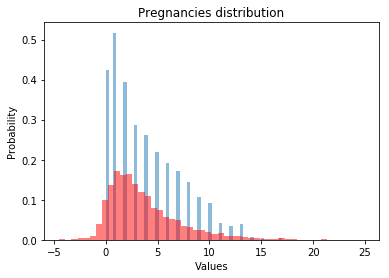

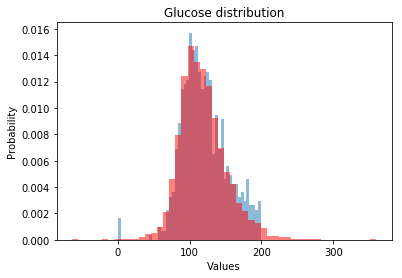

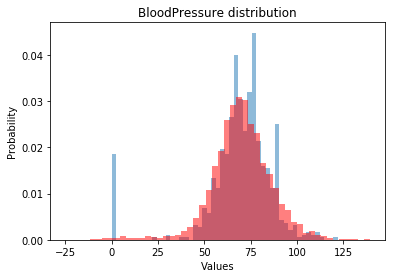

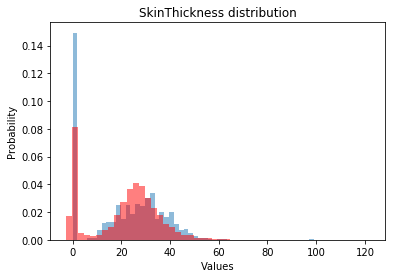

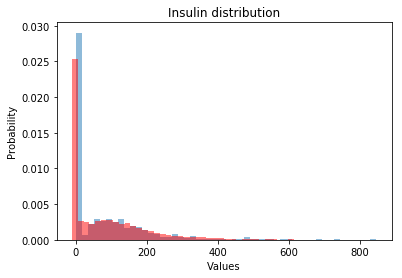

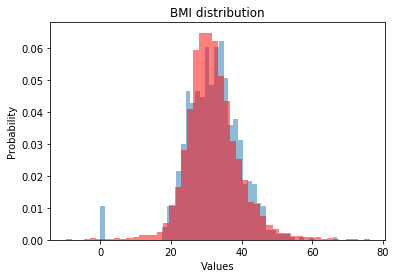

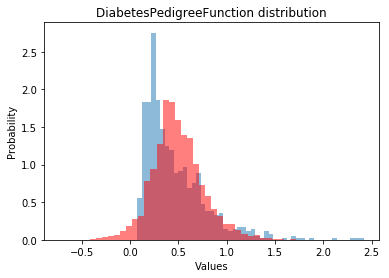

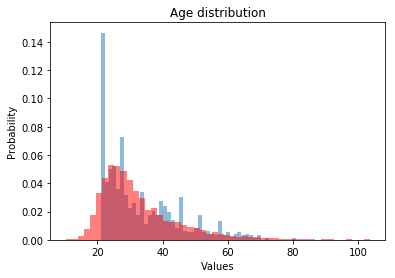

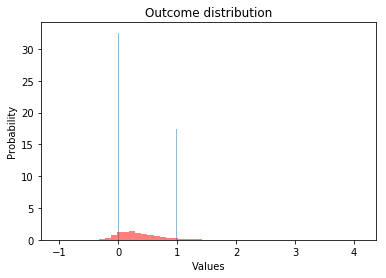

<Figure size 432x288 with 0 Axes>

In [6]:
from compare_data import *
compare_data("diabetes.csv", "report/diabetes_999.csv", 5000, "show")

# Week 2

- Implemented a Decision Tree classifier to compare and evaluate the "quality" of the fake data
- The examples below used the diabetes database and the fake data generated last week

Prediction error:  0.26956521739130435


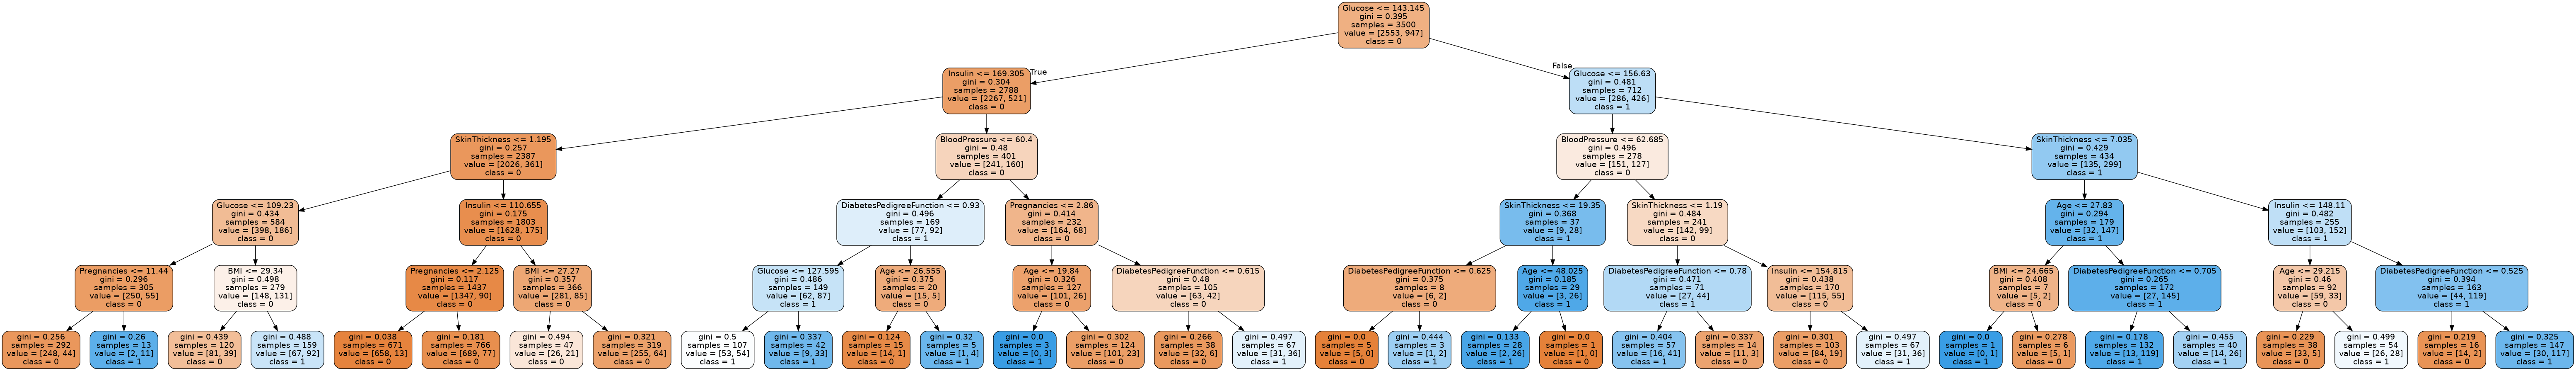

In [10]:
from decision_tree import *
import pandas as pd

data = pd.read_csv("diabetes.csv")
fake_data = pd.read_csv("fake_data/diabetes_999.csv")

#Treating the fake data
fake_data = fake_data.tail(5000)
fake_data.loc[fake_data.Outcome >= 0.5, 'Outcome'] = 1
fake_data.loc[fake_data.Outcome < 0.5, 'Outcome'] = 0

# Creating set of training and test data for both fake and original datasets
original_data_training_set = data.head(int(data.shape[0]*0.7))
fake_data_training_set  = fake_data.head(int(fake_data.shape[0]*0.7))
original_data_testing_set  = data.tail(int(data.shape[0]*0.3))
fake_data_testing_set  = fake_data.tail(int(fake_data.shape[0]*0.3))

create_and_evaluate_DT(fake_data_training_set, original_data_testing_set)

import pydotplus # Decision tree plotting
from IPython.display import Image
g = pydotplus.graph_from_dot_file(path="tree.dot")
Image(g.create_png())